## Examine stops by age/precinct

In [1]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

from datetime import datetime as dt
from matplotlib import font_manager as fm, rcParams
from matplotlib.lines import Line2D
from matplotlib.offsetbox import (
    AnnotationBbox,
    OffsetImage, 
)
from scipy.stats import gaussian_kde

np.set_printoptions(precision=5, suppress=True)

%matplotlib inline

In [2]:
df = pd.read_csv('data/SQF_2003_through_2019.csv')
df.head()

,ac_assoc,ac_cgdir,ac_evasv,ac_incid,ac_inves,ac_other,ac_proxm,ac_rept,ac_stsnd,ac_time,...,typeofid,weight,xcoord,ycoord,year,zip,dayofmonth,month,weekday,ordinalday
0,N,Y,Y,N,N,N,Y,Y,N,N,...,V,155,0981738,0198272,2006,,1,January,Sunday,732312
1,N,Y,N,Y,Y,N,Y,N,N,Y,...,V,180,0981349,0198508,2006,,1,January,Sunday,732312
2,N,N,N,N,N,N,N,N,N,Y,...,V,170,0982103,0198029,2006,,2,January,Monday,732313
3,N,N,N,Y,N,N,N,N,N,N,...,P,200,0983359,0203119,2006,,1,January,Sunday,732312
4,N,N,N,N,N,N,Y,Y,N,N,...,V,135,0981681,0203430,2006,,2,January,Monday,732313


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Define a function to plot kernel density estimates:

In [3]:
def get_KDE(contin, lambda_ = 0.25):
    '''gaussian kernel density estimate to check distribution of continuous variables'''
    density = gaussian_kde(contin)
    xs = np.linspace(contin.min(), contin.max(), 365)         
    density.covariance_factor = lambda : lambda_
    density._compute_covariance()
    return xs, density(xs)

In [4]:
years = range(2003, 2021)
## get ordinal for first day of each month in 2016
firstofyear = []
firstofmonth = []
for year in years:
    for month in range(1, 13):
        result = dt.strptime('{}-{}-01'.format(year, month), '%Y-%m-%d')#.date()
        if month == 1:
            firstofyear.append(result.toordinal())
        else:
            firstofmonth.append(result.toordinal())

In [5]:
race_dict = {
    'B' : 'Black',
    'Q' : 'White Hispanic',
    'W' : 'White',
    'P' : 'Black Hispanic',
    'A' : 'Asian/Pacific Islander', 
    'Z' : 'Other race',
    'U' : 'Unknown race',
    'I' : 'Native American',
    'BLACK' : 'Black',
    'WHITE HISPANIC' : 'White Hispanic',
    'WHITE' : 'White',
    'BLACK HISPANIC' : 'Black Hispanic',
    'ASIAN/PAC.ISL' : 'Asian/Pacific Islander',
    'AMER IND' : 'Native American',
    'ASIAN / PACIFIC ISLANDER' : 'Asian/Pacific Islander',
    'AMERICAN INDIAN/ALASKAN NATIVE' : 'Asian/Pacific Islander',
    'AMERICAN INDIAN/ALASKAN N' : 'Asian/Pacific Islander',
    'Other race' : 'Other/Unknown race',
    'Unknown race' : 'Other/Unknown race',
}
df['race'] = [race_dict[x] if x in race_dict.keys() else x for x in df['race']]
df['race'].value_counts()

Black                     2644795
White Hispanic            1240654
White                      505201
Black Hispanic             313771
Other race                 194237
Asian/Pacific Islander     156925
Unknown race                22883
Native American             19991
X                            2137
(null)                        420
                              164
MALE                            7
Name: race, dtype: int64

In [6]:
final_races = [
    'Black',
    'White Hispanic',
    'White',
    'Black Hispanic',
    'Other race',
    'Asian/Pacific Islander',
    'Native American'
]

df['race'] = ['Other race' if x not in final_races else x for x in df['race']]

df['race'].value_counts()

Black                     2644795
White Hispanic            1240654
White                      505201
Black Hispanic             313771
Other race                 219848
Asian/Pacific Islander     156925
Native American             19991
Name: race, dtype: int64

### Precint

In [7]:
df['pct'].value_counts()[:10]

75     267972
73     206662
79     150982
103    145588
40     141259
23     132569
120    132062
77     105897
44      99057
32      97176
Name: pct, dtype: int64

In [8]:
# some are str some are int
df['pct'] = [str(x).replace(' ', '') for x in df['pct']]
df['pct'].apply(lambda x: len(x)).value_counts()

2    3555181
3    1384369
1     161203
0        431
6          1
Name: pct, dtype: int64

In [9]:
df.loc[df['pct'].apply(lambda x: len(x) in [0, 6]), 'pct'].value_counts()

          431
208760      1
Name: pct, dtype: int64

In [10]:
len(df[df['pct'] == '999'])

1389

In [11]:
df.loc[df['pct'].apply(lambda x: len(x) in [0, 6]), 'pct'] = '999'
df['pct'] = [int(x) for x in df['pct']]
df['pct'].value_counts().sort_index()

1       22591
5       27065
6       28074
7       37630
9       45843
        ...  
120    132353
121      3855
122     65449
123     24252
999      1821
Name: pct, Length: 78, dtype: int64

### Sex

In [12]:
len(df[df['sex'].isnull()])

0

In [13]:
df['sex'].value_counts()

M         4570214
F          353434
Z          141277
MALE        32672
FEMALE       3217
(null)        203
              164
19              1
24              1
23              1
39              1
Name: sex, dtype: int64

In [14]:
sex_dict = {
    'MALE' : 'M',
    'FEMALE' : 'F',
    'M' : 'M',
    'F' : 'F',
}
df['sex'] = [sex_dict[x] if x in list(sex_dict.keys()) else 'Z' for x in df['sex']]

df['sex'].value_counts()

M    4602886
F     356651
Z     141648
Name: sex, dtype: int64

In [15]:
df.loc[df['sex'] == 'Z', 'pct'].value_counts()

75     10298
73      6322
103     5456
79      5146
44      4995
       ...  
1        291
999      157
123      137
100       39
121        7
Name: pct, Length: 78, dtype: int64

In [16]:
df.loc[df['sex'] == 'Z', 'pct'].value_counts().value_counts().sort_index()

7        1
39       1
137      1
157      1
291      1
        ..
4995     1
5146     1
5456     1
6322     1
10298    1
Name: pct, Length: 78, dtype: int64

In [17]:
Zs = df.loc[df['sex'] == 'Z', 'pct'].value_counts().sort_index()
Ms = df.loc[df['sex'] == 'M', 'pct'].value_counts().sort_index()
Fs = df.loc[df['sex'] == 'F', 'pct'].value_counts().sort_index()
totals = df['pct'].value_counts().sort_index()
   
pct_df = pd.DataFrame()

pct_df['pct'] = list(totals.index)
pct_df['total'] = list(totals.values)
pct_df['Z_count'] = list(Zs.values)
pct_df['F_count'] = list(Fs.values)
pct_df['M_count'] = list(Ms.values)
pct_df['Z_prop'] = pct_df['Z_count']/pct_df['total']
pct_df['F_prop'] = pct_df['F_count']/pct_df['total']
pct_df['M_prop'] = pct_df['M_count']/pct_df['total']

pct_df.head()

,pct,total,Z_count,F_count,M_count,Z_prop,F_prop,M_prop
0,1,22591,291,1648,20652,0.012881,0.072949,0.914169
1,5,27065,550,2579,23936,0.020321,0.095289,0.884389
2,6,28074,850,1989,25235,0.030277,0.070848,0.898874
3,7,37630,866,2646,34118,0.023014,0.070316,0.906670
4,9,45843,1256,3642,40945,0.027398,0.079445,0.893157


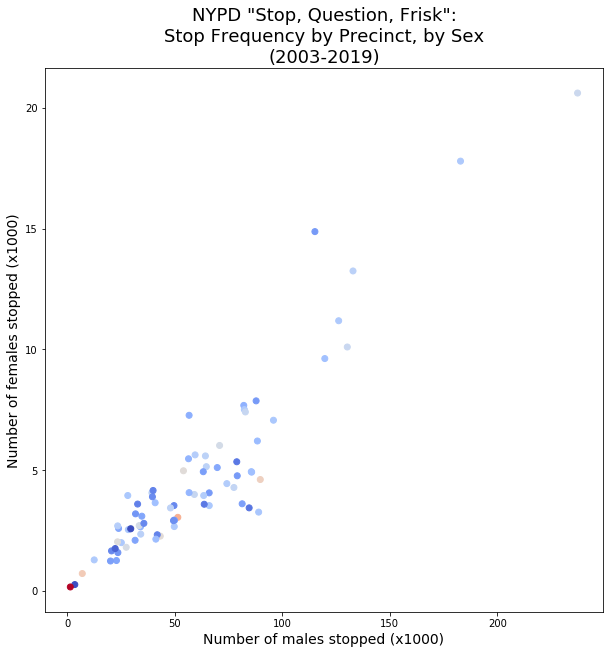

In [18]:
plt.figure(figsize = (10, 10))

plt.scatter(
    pct_df['M_count']/1.0E3,
    pct_df['F_count']/1.0E3,
    c = pct_df['Z_prop'],
    cmap = 'coolwarm',
)

plt.title('NYPD "Stop, Question, Frisk":\nStop Frequency by Precinct, by Sex\n(2003-2019)', fontsize = 18)
plt.xlabel('Number of males stopped (x1000)', fontsize = 14)
plt.ylabel('Number of females stopped (x1000)', fontsize = 14)

plt.show();

### Age

In [19]:
df['age'].value_counts()

20     285457
18     282575
19     282049
17     257769
21     242778
        ...  
623         1
153         1
626         1
631         1
467         1
Name: age, Length: 794, dtype: int64

In [20]:
df['age'] = [str(x).split('.')[0].replace(' ', '').replace('*', '') for x in df['age']]

df['age'].apply(lambda x: len(x)).value_counts()

2    5037643
1      53771
3       6896
6       2499
0        291
4         85
Name: age, dtype: int64

In [21]:
df.loc[df['age'].apply(lambda x: len(x) in [0, 4, 6]), 'pct'].value_counts()

75     142
52     116
71      92
67      89
40      89
      ... 
109      7
17       7
7        7
22       4
111      3
Name: pct, Length: 78, dtype: int64

In [22]:
len(df[df['age'] == '99'])

14435

In [23]:
df.loc[df['age'].apply(lambda x: len(x) in [0, 4, 6]), 'age'].value_counts()

(null)    2499
           291
9999        81
1316         1
1271         1
1742         1
1655         1
Name: age, dtype: int64

In [24]:
df.loc[df['age'].apply(lambda x: len(x) in [0, 4, 6]), 'age'] = '99'

df['age'] = [int(x) for x in df['age']]

df['age'].value_counts().sort_index()

0      45698
1       6016
2        503
3        325
4        135
       ...  
961        1
969        1
981        1
990        1
999     2085
Name: age, Length: 513, dtype: int64

In [25]:
df['age'] = [99 if x > 99 else x for x in df['age']]

df['age'].value_counts().sort_index()

0     45698
1      6016
2       503
3       325
4       135
      ...  
95       15
96       14
97       15
98       14
99    24206
Name: age, Length: 100, dtype: int64

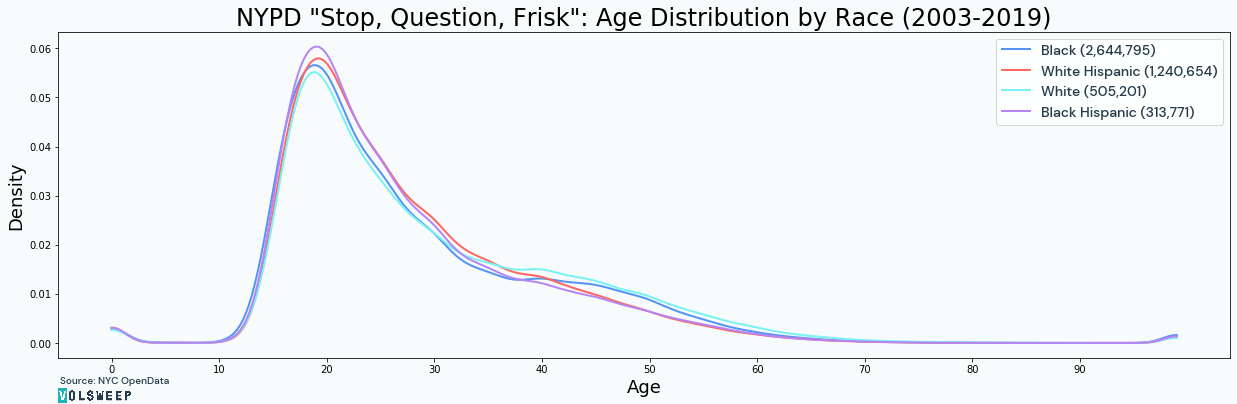

In [26]:
vol_light = '#f8fbfc'
vol_dark = '#263C4D'

fig = plt.figure(figsize = (21, 6))

# face/axis colors
fig.patch.set_facecolor(vol_light)
ax = fig.add_subplot(111)
ax.patch.set_facecolor(vol_light)

vol_dark_rcparams = [
    'patch.edgecolor',
    'grid.color',
    'text.color',
    'axes.labelcolor',
    'xtick.color',
    'ytick.color',
    'axes.edgecolor'
]

for which in vol_dark_rcparams:
    plt.rcParams[which] = vol_dark

font_dirs = ['../../../css/fonts/for_matplotlib/', ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)
font_list = fm.createFontList(font_files)
fm.fontManager.ttflist.extend(font_list)

plt.rcParams['font.family'] = 'DM Sans Medium'

colors = [
    '#5494F7',
    '#FF6661',
    '#78F2F2',
    '#B585F5',
]

races = list(df['race'].value_counts().index)
races = races[:4]

color_dict = dict(zip(races, colors))

for race in races:
    lil_df = df[df['race'] == race]
    xs, density_xs = get_KDE(lil_df['age'], lambda_ = 0.1)
    plt.plot(
        xs, 
        density_xs, 
        lw = 2., 
        label = race + ' ({:,})'.format(len(lil_df)),
        color = color_dict[race]
        
    )

plt.title('NYPD "Stop, Question, Frisk": Age Distribution by Race (2003-2019)', fontsize = 24)
plt.xticks(range(0, df['age'].max(), 10))
plt.xlabel('Age', fontsize = 18)
# plt.yticks(fontsize = 14)
plt.ylabel('Density', fontsize = 18)
plt.legend(loc = 'upper right', fontsize = 14)
x = ax.annotate('Source: NYC OpenData', 
                xy=(0.0, 0.0), 
                xytext=(56.0, -28.0), 
                ha='center', 
                va='bottom', 
                textcoords='axes pixels', 
                xycoords='axes pixels',
               )
# logo
arr_img = plt.imread('../../../assets/VOL_Logo_Color_Light_Green.png')
imagebox = OffsetImage(arr_img, zoom=0.07)
imagebox.image.axes = ax
xy = (0.0, -45.0)
ab = AnnotationBbox(imagebox, 
                    xy,
                    xybox=(xy[0], xy[1]),
                    xycoords='axes pixels',
                    boxcoords=('axes pixels'),
                    box_alignment=(0., 0.),
                    frameon=False,
                   )
ax.add_artist(ab)

plt.grid(False)
plt.show();

In [27]:
len(df[(df['age'] > 5) & (df['age'] < 80)])/len(df)

0.9845726042086299

In [28]:
bad_age = df.loc[(df['age'] <= 5) | (df['age'] >= 80), 'pct'].value_counts()
print(len(bad_age))
bad_age.sort_index()

78


1       288
5       423
6       479
7       514
9       764
       ... 
120    1267
121      31
122     527
123      90
999     127
Name: pct, Length: 78, dtype: int64

In [29]:
pct_df['bad_age'] = list(bad_age.values)

pct_df['bad_age_prop'] = pct_df['bad_age']/pct_df['total']

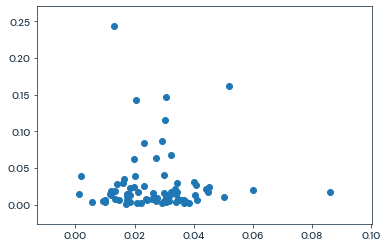

In [30]:
plt.figure()

plt.scatter(
    pct_df['Z_prop'],
    pct_df['bad_age_prop'],
)

plt.show();

In [31]:
pct_df.sort_values(['bad_age_prop'], ascending = False)[:10]

,pct,total,Z_count,F_count,M_count,Z_prop,F_prop,M_prop,bad_age,bad_age_prop
0,1,22591,291,1648,20652,0.012881,0.072949,0.914169,5488,0.242929
12,22,8206,427,711,7068,0.052035,0.086644,0.861321,1327,0.161711
8,17,14329,441,1276,12612,0.030777,0.089050,0.880173,2107,0.147044
1,5,27065,550,2579,23936,0.020321,0.095289,0.884389,3855,0.142435
2,6,28074,850,1989,25235,0.030277,0.070848,0.898874,3241,0.115445
5,10,31943,932,2530,28481,0.029177,0.079204,0.891619,2780,0.087030
3,7,37630,866,2646,34118,0.023014,0.070316,0.906670,3163,0.084055
9,18,27078,878,2684,23516,0.032425,0.099121,0.868454,1818,0.067139
4,9,45843,1256,3642,40945,0.027398,0.079445,0.893157,2925,0.063805
6,13,38598,765,3086,34747,0.019820,0.079952,0.900228,2396,0.062076


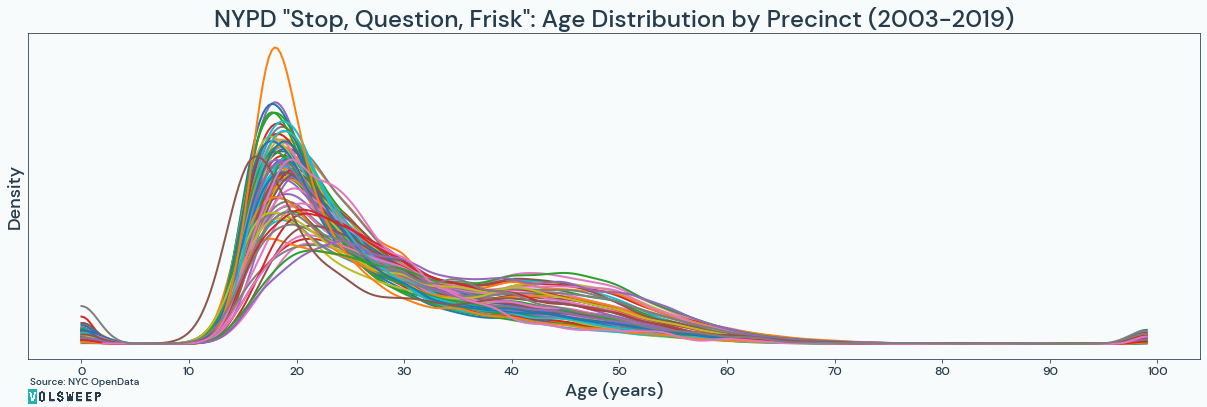

In [32]:
vol_light = '#f8fbfc'
vol_dark = '#263C4D'

fig = plt.figure(figsize = (21, 6))

# face/axis colors
fig.patch.set_facecolor(vol_light)
ax = fig.add_subplot(111)
ax.patch.set_facecolor(vol_light)

vol_dark_rcparams = [
    'patch.edgecolor',
    'grid.color',
    'text.color',
    'axes.labelcolor',
    'xtick.color',
    'ytick.color',
    'axes.edgecolor'
]

for which in vol_dark_rcparams:
    plt.rcParams[which] = vol_dark

font_dirs = ['../../../css/fonts/for_matplotlib/', ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)
font_list = fm.createFontList(font_files)
fm.fontManager.ttflist.extend(font_list)

plt.rcParams['font.family'] = 'DM Sans Medium'

pcts = list(df['pct'].value_counts().index)
for pct in pcts:
    lil_df = df[df['pct'] == pct]
    xs, density_xs = get_KDE(lil_df['age'], lambda_ = 0.1)
    plt.plot(
        xs, 
        density_xs, 
        lw = 2., 
        
    )

plt.title('NYPD "Stop, Question, Frisk": Age Distribution by Precinct (2003-2019)', fontsize = 24)
plt.xticks(range(0, df['age'].max() + 10, 10), fontsize = 12)
plt.xlabel('Age (years)', fontsize = 18)
plt.yticks([])
plt.ylabel('Density', fontsize = 18)
# plt.legend(loc = 'upper right', fontsize = 14)
x = ax.annotate('Source: NYC OpenData', 
                xy=(0.0, 0.0), 
                xytext=(56.0, -28.0), 
                ha='center', 
                va='bottom', 
                textcoords='axes pixels', 
                xycoords='axes pixels',
               )
# logo
arr_img = plt.imread('../../../assets/VOL_Logo_Color_Light_Green.png')
imagebox = OffsetImage(arr_img, zoom=0.07)
imagebox.image.axes = ax
xy = (0.0, -45.0)
ab = AnnotationBbox(imagebox, 
                    xy,
                    xybox=(xy[0], xy[1]),
                    xycoords='axes pixels',
                    boxcoords=('axes pixels'),
                    box_alignment=(0., 0.),
                    frameon=False,
                   )
ax.add_artist(ab)

plt.grid(False)
plt.show();

In [33]:
# remove ages < 5 and > 80
df = df[(df['age'] > 5) & (df['age'] < 80)]

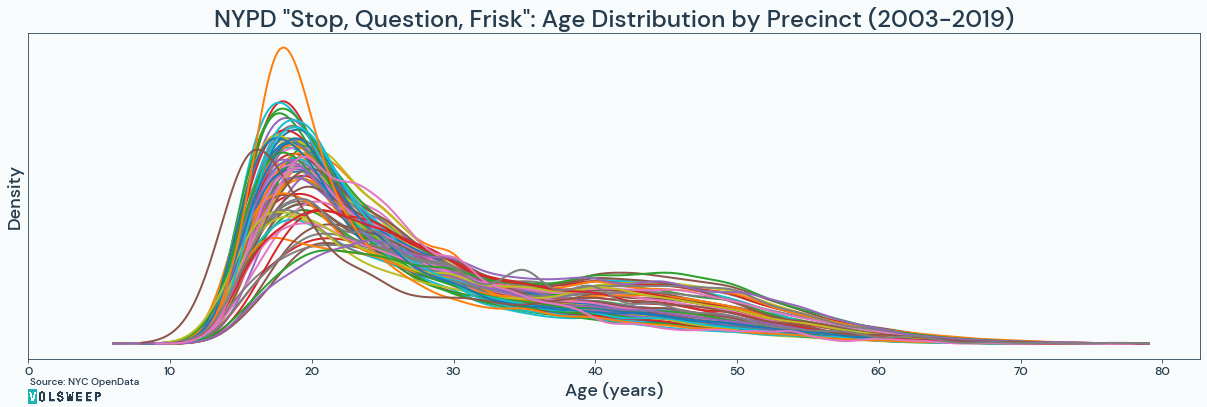

In [34]:
vol_light = '#f8fbfc'
vol_dark = '#263C4D'

fig = plt.figure(figsize = (21, 6))

# face/axis colors
fig.patch.set_facecolor(vol_light)
ax = fig.add_subplot(111)
ax.patch.set_facecolor(vol_light)

vol_dark_rcparams = [
    'patch.edgecolor',
    'grid.color',
    'text.color',
    'axes.labelcolor',
    'xtick.color',
    'ytick.color',
    'axes.edgecolor'
]

for which in vol_dark_rcparams:
    plt.rcParams[which] = vol_dark

font_dirs = ['../../../css/fonts/for_matplotlib/', ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)
font_list = fm.createFontList(font_files)
fm.fontManager.ttflist.extend(font_list)

plt.rcParams['font.family'] = 'DM Sans Medium'

pcts = list(df['pct'].value_counts().index)
for pct in pcts:
    lil_df = df[df['pct'] == pct]
    xs, density_xs = get_KDE(lil_df['age'], lambda_ = 0.1)
    plt.plot(
        xs, 
        density_xs, 
        lw = 2., 
        
    )

plt.title('NYPD "Stop, Question, Frisk": Age Distribution by Precinct (2003-2019)', fontsize = 24)
plt.xticks(range(0, df['age'].max() + 10, 10), fontsize = 12)
plt.xlabel('Age (years)', fontsize = 18)
plt.yticks([])
plt.ylabel('Density', fontsize = 18)
# plt.legend(loc = 'upper right', fontsize = 14)
x = ax.annotate('Source: NYC OpenData', 
                xy=(0.0, 0.0), 
                xytext=(56.0, -28.0), 
                ha='center', 
                va='bottom', 
                textcoords='axes pixels', 
                xycoords='axes pixels',
               )
# logo
arr_img = plt.imread('../../../assets/VOL_Logo_Color_Light_Green.png')
imagebox = OffsetImage(arr_img, zoom=0.07)
imagebox.image.axes = ax
xy = (0.0, -45.0)
ab = AnnotationBbox(imagebox, 
                    xy,
                    xybox=(xy[0], xy[1]),
                    xycoords='axes pixels',
                    boxcoords=('axes pixels'),
                    box_alignment=(0., 0.),
                    frameon=False,
                   )
ax.add_artist(ab)

plt.grid(False)
plt.show();

In [35]:
df['pct'].describe()

count    5.022487e+06
mean     6.834464e+01
std      3.716530e+01
min      1.000000e+00
25%      4.100000e+01
50%      7.300000e+01
75%      1.010000e+02
max      9.990000e+02
Name: pct, dtype: float64

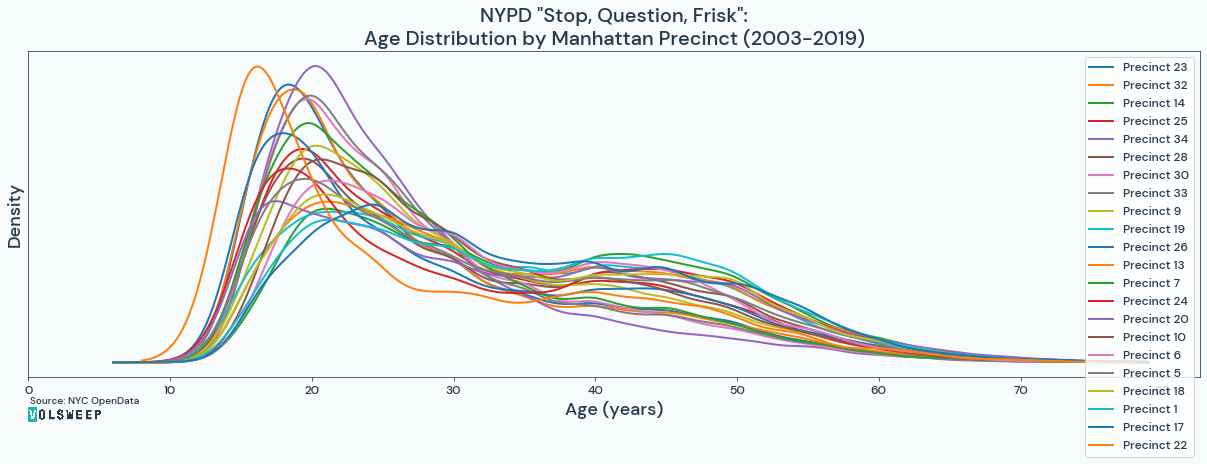

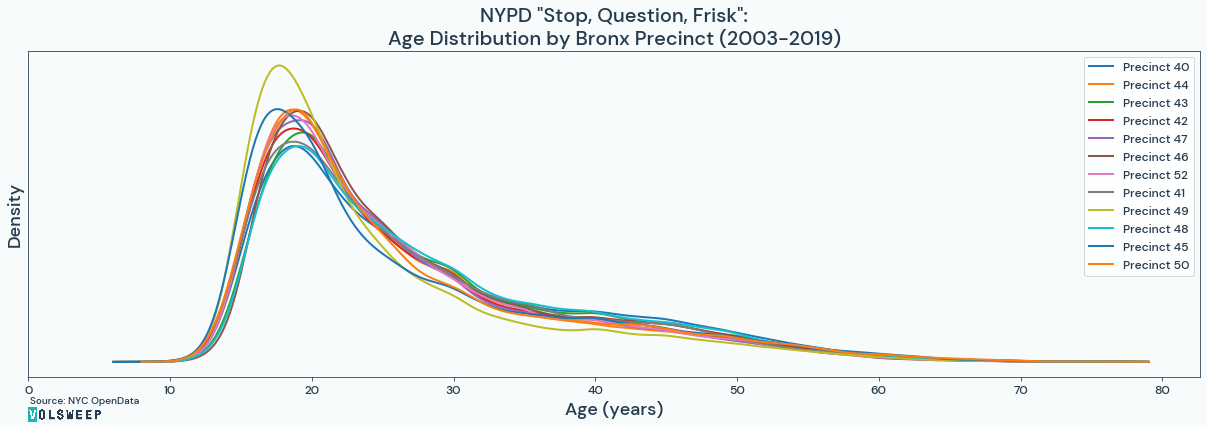

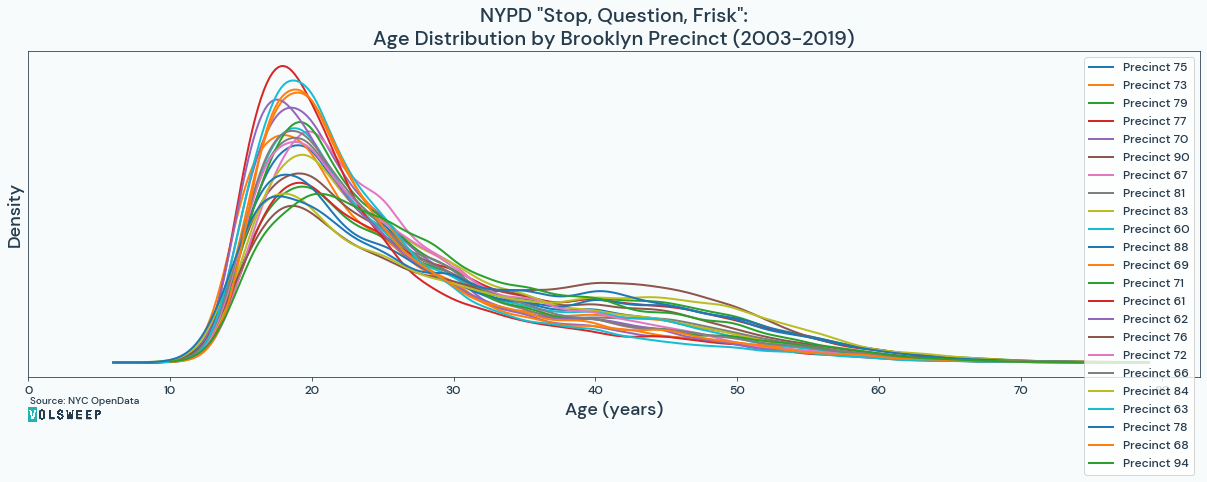

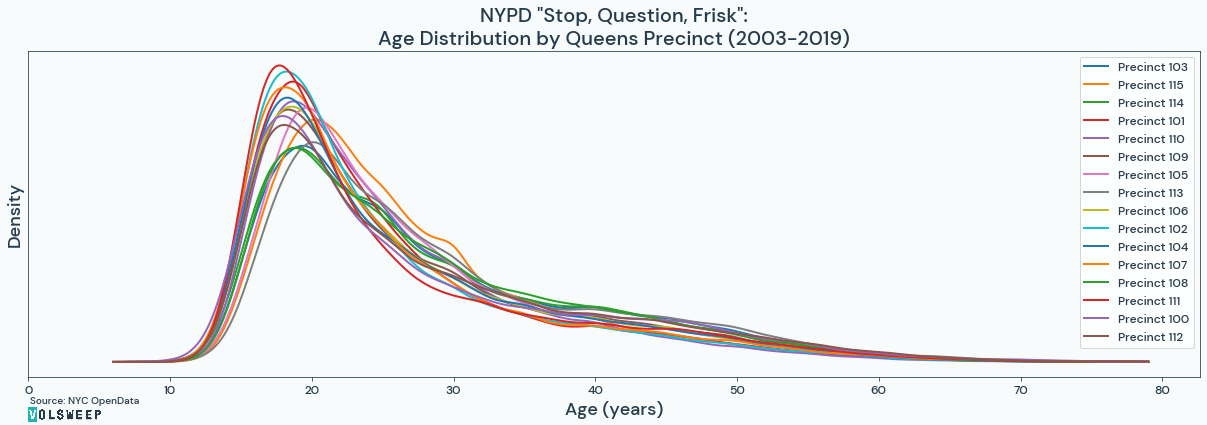

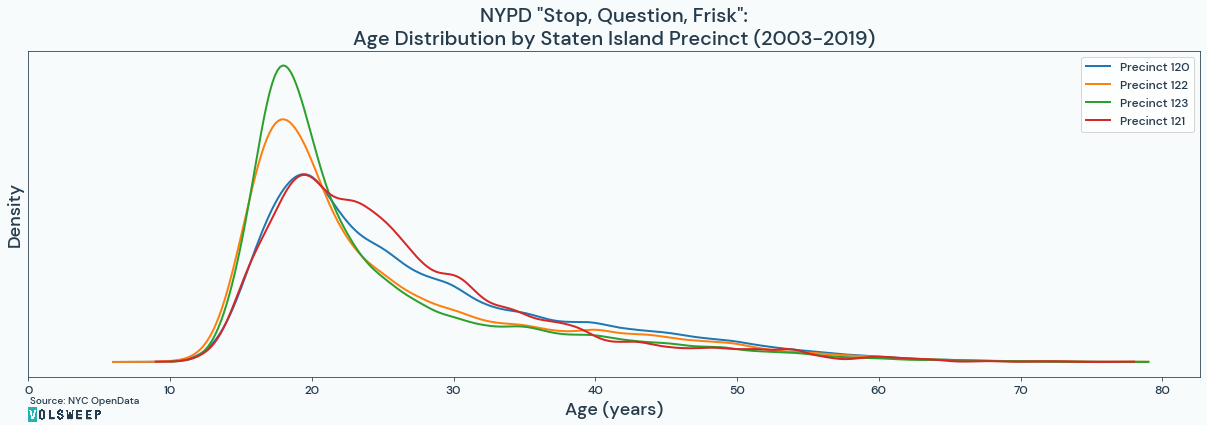

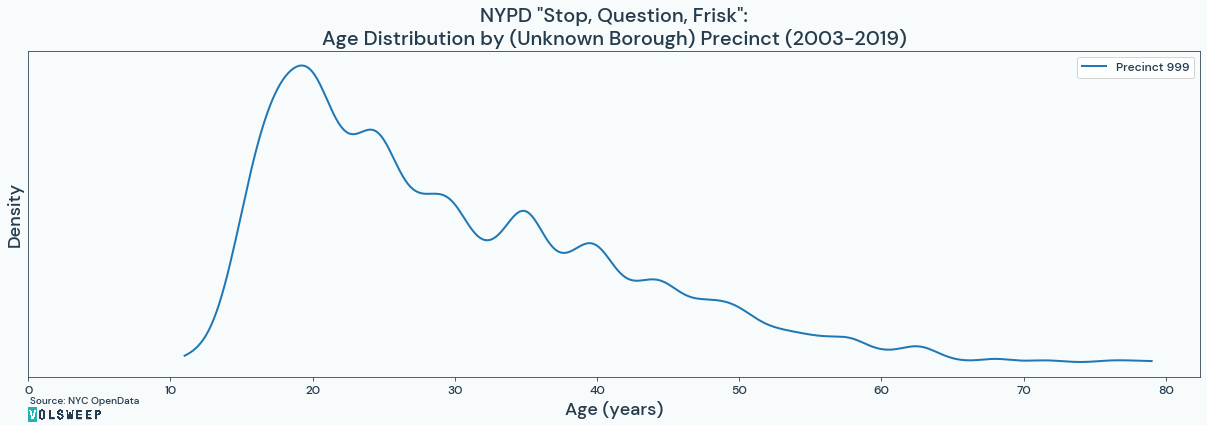

In [36]:
vol_light = '#f8fbfc'
vol_dark = '#263C4D'

boroughs = {
    'Manhattan' : range(1, 35),
    'Bronx' : range(40, 53),
    'Brooklyn' : range(60, 95),
    'Queens' : range(100, 116),
    'Staten Island' : range(120, 124),
    '(Unknown Borough)' : range(124, 1000),
}

for borough in list(boroughs.keys()):
    boro_df = df[df['pct'].apply(lambda x: x in boroughs[borough])]
    fig = plt.figure(figsize = (21, 6))

    # face/axis colors
    fig.patch.set_facecolor(vol_light)
    ax = fig.add_subplot(111)
    ax.patch.set_facecolor(vol_light)

    vol_dark_rcparams = [
        'patch.edgecolor',
        'grid.color',
        'text.color',
        'axes.labelcolor',
        'xtick.color',
        'ytick.color',
        'axes.edgecolor'
    ]

    for which in vol_dark_rcparams:
        plt.rcParams[which] = vol_dark

    font_dirs = ['../../../css/fonts/for_matplotlib/', ]
    font_files = fm.findSystemFonts(fontpaths=font_dirs)
    font_list = fm.createFontList(font_files)
    fm.fontManager.ttflist.extend(font_list)

    plt.rcParams['font.family'] = 'DM Sans Medium'

    pcts = list(boro_df['pct'].value_counts().index)
    for pct in pcts:
        lil_df = boro_df[boro_df['pct'] == pct]
        xs, density_xs = get_KDE(lil_df['age'], lambda_ = 0.1)
        plt.plot(
            xs, 
            density_xs, 
            lw = 2., 
            label = f'Precinct {pct}',
        )

    plt.title(
        f'NYPD "Stop, Question, Frisk":\nAge Distribution by {borough} Precinct (2003-2019)', 
        fontsize = 20, 
    )
    plt.xticks(range(0, df['age'].max() + 10, 10), fontsize = 12)
    plt.xlabel('Age (years)', fontsize = 18)
    plt.yticks([])
    plt.ylabel('Density', fontsize = 18)
    plt.legend(loc = 'upper right', fontsize = 12)
    x = ax.annotate('Source: NYC OpenData', 
                    xy=(0.0, 0.0), 
                    xytext=(56.0, -28.0), 
                    ha='center', 
                    va='bottom', 
                    textcoords='axes pixels', 
                    xycoords='axes pixels',
                   )
    # logo
    arr_img = plt.imread('../../../assets/VOL_Logo_Color_Light_Green.png')
    imagebox = OffsetImage(arr_img, zoom=0.07)
    imagebox.image.axes = ax
    xy = (0.0, -45.0)
    ab = AnnotationBbox(imagebox, 
                        xy,
                        xybox=(xy[0], xy[1]),
                        xycoords='axes pixels',
                        boxcoords=('axes pixels'),
                        box_alignment=(0., 0.),
                        frameon=False,
                       )
    ax.add_artist(ab)

    plt.grid(False)
    plt.show();